# Data Analyzer

## Where the data comes from?

Origin is considered one of the most critical factors in determining the characteristics of coffee, as the natural environment in which the fruits are grown, such as soil type, topography, and climate, has a profound impact on their sensory attributes. 

> La Celia farm is renowned for producing high-quality coffee, thanks in part to its prime location in the Andes Mountains in Manizales city. With an altitude range of 1,850 to 1,900 meters above sea level, the coffee cherries mature slowly, resulting in a rich and complex flavor profile. The farm is surrounded by lush forests, bamboo, and a diverse array of fruits and vegetables, such as orange, mandarine, guava, avocado, and banana. The fertile volcanic soil, due to its proximity to the Cumanday or Nevado del Ruiz volcano, adds to the unique terroir of the farm. The farm boasts around 1 hectare of Castillo coffee trees, with 6,000 plants in total. 
>
> La Celia uses three different types of processing methods: Red Honey (48-hour fermentation in cherry), Yellow Honey (48-hour fermentation in mucilage), and washed (48-hour fermentation in mucilage and washed with water). The honey process is more sustainable than the washed process, as it doesn't require water. The coffee beans are dried in the sun, a process that can take longer due to the rainy conditions in the region, but which ultimately yields a higher-quality product due to the main idea to the interation between the seed embryo and sun rays.

<img src="./La_Celia_farm.JPG" alt="La Celia coffee farm" width="50%">

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib import rc

In [3]:
# Import data
data_path = os.path.join('..', 'data', 'processed_data','data_sorted.json')
coffee_data = pd.read_json(data_path)
coffee_data.drop("ID", axis=1, inplace=True)

### Data Exploration

In [4]:
print("Data shape: ", coffee_data.shape)
print("Data types: ", coffee_data.dtypes)
print("Data head: ", coffee_data.head())

Data shape:  (63, 17)
Data types:  Acidez             float64
Almendra sana      float64
Balance            float64
Broca              float64
Cuerpo             float64
Descripcion         object
Dulzura              int64
Fecha               object
Fragancia/Aroma    float64
Humedad            float64
Pasilla            float64
Puntaje Catador    float64
Puntaje Total      float64
Sabor              float64
Sabor Residual     float64
Taza Limpia          int64
Uniformidad          int64
dtype: object
Data head:     Acidez  Almendra sana  Balance  Broca  Cuerpo  \
0     7.5          76.20     7.50   0.16    7.50   
1     7.5          76.70     7.00   0.50    7.00   
2     7.5          78.45     7.25   0.45    7.25   
3     7.0          74.60     7.00   4.05    7.00   
4     7.0          76.65     7.00   1.44    7.00   

                                         Descripcion  Dulzura       Fecha  \
0  ['Fragancia: N/A', 'Aroma: Frutal', 'herbales,...       10  11/03/2019   
1  ['Fraganci

> ### 3 types of information about coffee:
> **Physical properties**: Almendra sana, Pasilla, Humedad, Broca. *Presented as a percentage %*
>
> **Quantitative atributes** (Scored by a Q Grader: Professional coffee taster): Balance, Cuerpo, Dulzura, Fragancia/Aroma, Sabor, Sabor Residual, Taza limpia, Uniformidad. *The score is going from 1 (minimum) and 10 (maximum)*
>
> **Qualitative attributes**: Related to the coffee sensorial attributes in flavor, fragrance and aroma.

In [5]:
coffee_data.describe()

,Acidez,Almendra sana,Balance,Broca,Cuerpo,Dulzura,Fragancia/Aroma,Humedad,Pasilla,Puntaje Catador,Puntaje Total,Sabor,Sabor Residual,Taza Limpia,Uniformidad
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.0
mean,7.591270,76.482857,7.607143,1.048095,7.552381,10.0,7.674603,10.187302,2.886984,7.554762,83.158730,7.571429,7.607143,10.0,10.0
std,0.207236,3.798403,0.232076,0.908297,0.211261,0.0,0.227340,1.019882,2.224886,0.197303,1.222522,0.251722,0.227691,0.0,0.0
min,7.000000,61.300000,7.000000,0.000000,7.000000,10.0,7.000000,7.700000,0.700000,7.000000,79.000000,7.000000,7.000000,10.0,10.0
25%,7.500000,74.525000,7.500000,0.450000,7.500000,10.0,7.500000,9.550000,1.450000,7.500000,82.625000,7.500000,7.500000,10.0,10.0
50%,7.500000,76.650000,7.500000,0.850000,7.500000,10.0,7.750000,10.200000,2.350000,7.500000,83.000000,7.500000,7.500000,10.0,10.0
75%,7.750000,79.500000,7.750000,1.420000,7.750000,10.0,7.750000,10.750000,3.550000,7.750000,84.000000,7.750000,7.750000,10.0,10.0
max,8.000000,82.100000,8.000000,4.050000,8.000000,10.0,8.250000,13.200000,14.050000,8.000000,86.000000,8.000000,8.000000,10.0,10.0


## Histogram Information 

**Physical properties**:
In the below plot, we can see the distribution of the physical properties of the coffee samples . The variables and its corresponding analysis are:

> - *Almendra sana:* The majority of values fall within ranges considered healthy for coffee seeds.
> - *Broca, pasilla* These distribution represents the coffee seeds affected by the coffee borer, as can be noted, the coffee seeds are not noticeably damaged by this insect. Probably, the good farm management practices and farm's high altitude have prevented the borer from affecting the coffee seeds.
> - *Humedad:* Represents the moisture content of the seeds. The plot suggests that most of the coffee samples fall within the optimal range of dehydration (10% - 12%).

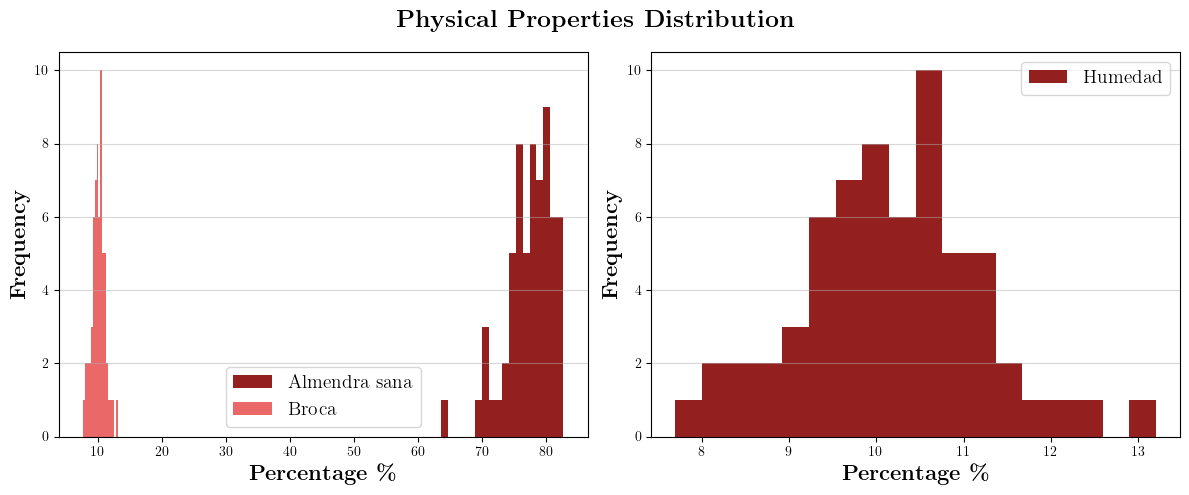

In [6]:
with plt.rc_context({"font.family": "serif", "font.serif": ["Computer Modern Roman"], "text.usetex": True}):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.subplots_adjust(wspace=0.3)

    # Create a new column that is the sum of "Almendra sana" and "Broca"
    coffee_data["Almendra_sana_Broca"] = coffee_data["Almendra sana"] + coffee_data["Broca"]

    cols_to_plot = ["Almendra_sana_Broca", "Humedad"]
    colors = ["#941F1F", "#EA6868"]
    labels = ["Almendra sana", "Broca"]

    for i, col in enumerate(cols_to_plot):
        axs[0].hist(coffee_data[col], bins=18, color=colors[i], label=labels[i])

    axs[0].set_xlabel(r"\textbf{Percentage \%}", fontsize=16)
    axs[0].set_ylabel(r"\textbf{Frequency}", fontsize=16)
    axs[0].tick_params(axis="both", labelsize=10)
    axs[0].grid(axis="y", alpha=0.5)
    axs[0].legend(fontsize=14)

    for i, col in enumerate(cols_to_plot):
        if col != "Humedad":
            continue
        axs[1].hist(coffee_data[col], bins=18, color="#941F1F", label=col)
        axs[1].set_xlabel(r"\textbf{Percentage \%}", fontsize=16)
        axs[1].set_ylabel(r"\textbf{Frequency}", fontsize=16)
        axs[1].tick_params(axis="both", labelsize=10)
        axs[1].grid(axis="y", alpha=0.5)
        axs[1].legend(fontsize=14)

    fig.suptitle(
        r"\textbf{Physical Properties Distribution}", fontsize=18, fontweight="bold"
    )
    plt.tight_layout()
    plt.show()

**Quantitative attributes:**
The following plots illustrate the distribution of the quantitative attributes in the coffee samples. The y-axis displays the frequency of occurrence for each value, while the x-axis represents the corresponding points awarded by the coffee taster for each attribute. The analyzed variables and their corresponding results are as follows:

> - *Dulzura, Taza limpia, Uniformidad:* These 3 coffee attributes achieved the maximum score of 10, which is constant for these attibutes, indicating a high level of consistency in the coffee's quality. This means that the coffee is notably sweet, uncontaminated, and has a consistent flavor across the different cups of the analyzed sample.

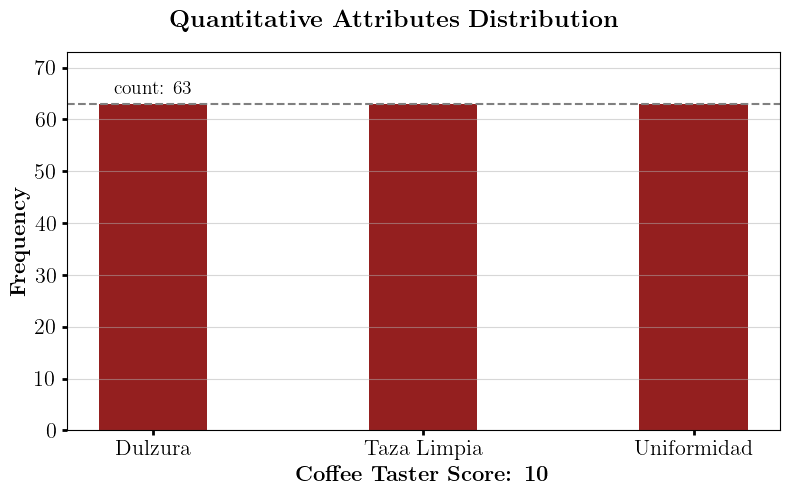

In [7]:
with plt.rc_context({"font.family": "serif", "font.serif": ["Computer Modern Roman"], "text.usetex": True}):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

    cols_to_plot = ["Dulzura", "Taza Limpia", "Uniformidad"]
    xlabels = cols_to_plot
    counts = [len(coffee_data[col]) for col in cols_to_plot]

    max_counts = max(counts)
    max_index = counts.index(max_counts)

    axs.bar(xlabels, counts, color="#941F1F", width=0.4)
    axs.set_ylabel(r"\textbf{Frequency}", fontsize=16)
    axs.set_xlabel(r"\textbf{Coffee Taster Score: 10}", fontsize=16)
    axs.tick_params(axis="both", labelsize=16, width=2)
    axs.grid(axis="y", alpha=0.5)
    axs.axhline(y=max_counts, color='gray', linestyle='--')
    axs.text(max_index, max_counts+2, f"count: {max_counts}", ha='center', fontsize=14)
    axs.set_ylim([0, max_counts+10])
    fig.suptitle(r"\textbf{Quantitative Attributes Distribution}", fontsize=18, fontweight="bold")
    plt.tight_layout()
    plt.show()

> - *Acidez, Balance, Cuerpo, Fragancia/Aroma, Sabor, Sabor Residual*: 

We have summarized some of the statistical properties of our coffee variables using a violin plot, which provides an intuitive visual representation of the distribution shape of our data. In this plot, the white dot represents the median, and the thick gray bar in the center shows the interquartile range. The thin gray line represents the remaining distribution, and the wider sections of the plot, 7.5 and 7.8, correspond to a higher probability of the variable taking on a given value. Conversely, the thinner sections of the plot correspond to lower frequency values.

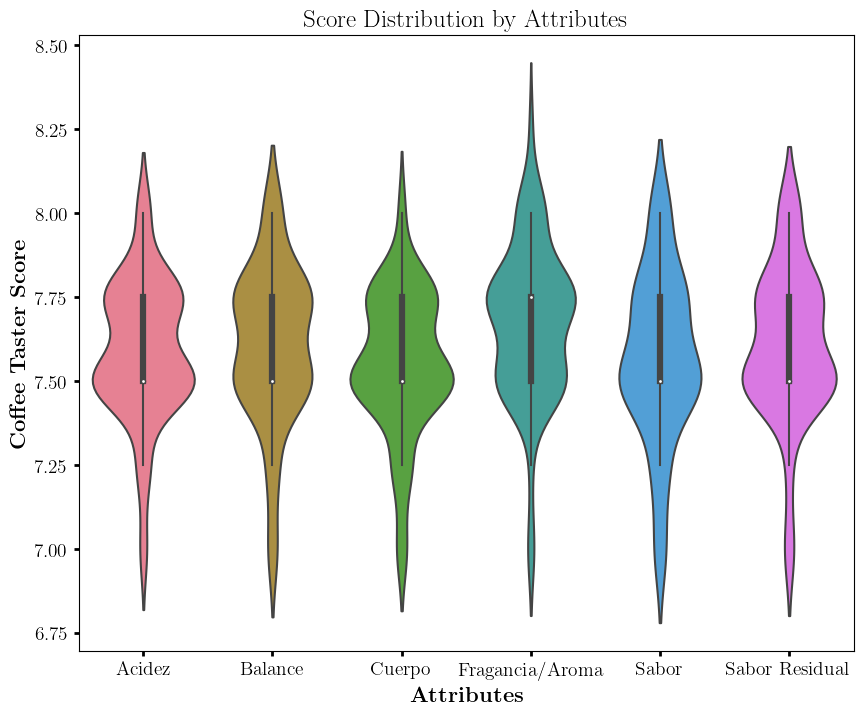

In [8]:
with plt.rc_context({"font.family": "serif", "font.serif": ["Computer Modern Roman"], "text.usetex": True}):

    cols_to_plot = [
        "Acidez",
        "Balance",
        "Cuerpo",
        "Fragancia/Aroma",
        "Sabor",
        "Sabor Residual",
    ]

    fig, ax = plt.subplots(figsize=(10, 8))

    sns.violinplot(data=coffee_data[cols_to_plot], ax=ax, palette="husl")

    ax.set_xlabel(r"\textbf{Attributes}", fontsize=16)
    ax.set_ylabel(r"\textbf{Coffee Taster Score}", fontsize=16)
    ax.tick_params(axis="both", labelsize=14, width=2)
    ax.set_title("Score Distribution by Attributes", fontsize=18)

    plt.show()

## Improvement in coffee processing
The coffee growers at La Celia farm have been actively pursuing specialty coffees since 2019 through experimentation with new fermentation techniques, flora additions, and good agriculture practices. Our analysis of the data provides them with valuable feedback on the effectiveness of their efforts towards improving coffee quality. To answer this question, we need to create two plots: one showing the average "Total Score" over time, and the other displaying the average "Puntaje Catador" as a function of the years.

> ### Average Total score
>Total score considers the sum of: Acidez, Cuerpo, Dulzura, Balance, Sabor, Sabor Residual, Puntaje Catador, Fragancia/Aroma, Taza limpia, Uniformidad.
>The average of this value is calculated for every year.


In [10]:
with plt.rc_context({"font.family": "serif", "font.serif": ["Computer Modern Roman"], "text.usetex": True}):

    total_score = coffee_data[["Fecha", "Puntaje Total"]].sort_values("Fecha")
    total_score["Fecha"] = pd.to_datetime(total_score["Fecha"], format='%d/%m/%Y')
    score_by_year = total_score.groupby(total_score["Fecha"].dt.year)["Puntaje Total"].agg(['mean', 'std'])

    plt.figure(figsize=(10, 8))
    plt.errorbar(score_by_year.index, score_by_year['mean'], yerr=score_by_year['std'], marker="o", color="#941F1F")
    plt.title(r"\textbf{Average Total Score by Year}", size=20)
    plt.xlabel(r"\textbf{Year}", size=18)
    plt.ylabel(r"\textbf{Average Total Score (Points)}", size=18)
    plt.xticks(score_by_year.index, rotation=45, ha="right", size=15)
    plt.yticks(size=15)
    plt.gca().yaxis.set_major_formatter("{:.2f}".format)
    plt.grid(axis="both", alpha=0.5)

    # Add a horizontal line for the overall average score
    overall_avg_score = coffee_data["Puntaje Total"].mean()
    plt.axhline(overall_avg_score, color="gray", linestyle="--")
    plt.text(score_by_year.index[0], overall_avg_score + 0.1, f"Overall Avg: {overall_avg_score:.2f}", fontsize=12)

    fig_path = os.path.join('.', 'score_by_year.png')
    plt.savefig(fig_path)

The trend shown in the above figure clearly indicates the positive influence of the efforts made by the coffee growers of La Celia farm in achieving high-quality coffee profiles. This information provides them with a valuable indicator that their coffee processing methods are significantly enhancing the quality of their coffee beans.
On the other side, the average Coffee Taster Score from the years 2019 to 2022 is 83 points, with a tendency to increase the value of this score over time. This is a good indicator that the coffee growers are becoming more experienced producing specialty coffee, and that their efforts are paying off. 

>### Average Coffee Taster Score
>Another parameter worth investigating in greater depth is the coffee taster score (#941F1F), as it is the individual responsible for assessing the coffee based on both quantitative variables, (such as those mentioned above), as well as qualitative variables that are related to the sensory attributes.

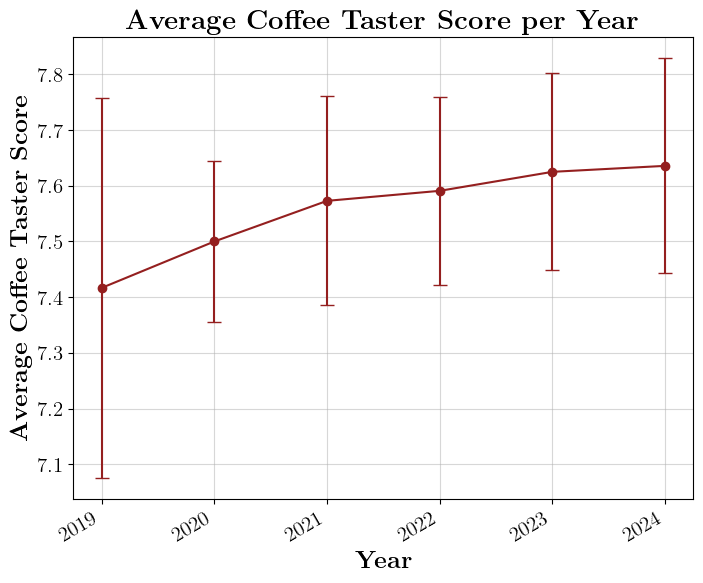

In [48]:
with plt.rc_context({"font.family": "serif", "font.serif": ["Computer Modern Roman"], "text.usetex": True}):

    coffee_data["Fecha"] = pd.to_datetime(coffee_data["Fecha"], format='%d/%m/%Y')
    
    coffee_taster_score = coffee_data[["Fecha", "Puntaje Catador"]].sort_values("Fecha")
    coffee_taster_score = coffee_taster_score.groupby(coffee_taster_score["Fecha"].dt.year)["Puntaje Catador"].agg(['mean', 'std'])
    
    plt.figure(figsize=(8,6))
    plt.errorbar(coffee_taster_score.index, coffee_taster_score['mean'], yerr=coffee_taster_score['std'], marker="o", color="#941F1F", capsize=5)
    plt.title(r"\textbf{Average Coffee Taster Score per Year}", size=20)
    plt.xlabel(r"\textbf{Year}", size=18)
    plt.ylabel(r"\textbf{Average Coffee Taster Score}", size=18)
    plt.xticks(coffee_taster_score.index, rotation=30, ha="right", size=15)
    plt.yticks(size=15)
    plt.grid(axis="both", alpha=0.5)
    
    plt.savefig("coffe_taster_score.png", dpi=300, bbox_inches='tight')
    plt.show()


The graph above serves as compelling evidence of the constant improvement in the quality profile of coffee, owing to the commendable efforts put forth by coffee growers. The increasing trend in coffee scores provided by professional coffee tasters is a testament to their hard work and dedication. Although processing coffee to maintain consistency may present its challenges, this steady progress should serve as a source of motivation for growers to keep up their great work and strive for even better results every year.

The average taster score has been improving slightly over the years, with 2024 showing the highest average Puntaje Catador of 7.64. This suggests a gradual improvement in coffee quality over time.

## Qualitative attributes

The coffee cupping process is a quantifiable and measurable analysis method to evaluate a coffee sample, including its overall quality to individual characteristics and specific flavour notes.
This evaluation involves three distinct sensory experiences that allow for the assessment of aromatics, flavors, and other various components of the coffee.

>### Fragrance
> Defined as the smell of the ground coffee when still dry. (coffee recently grinded)

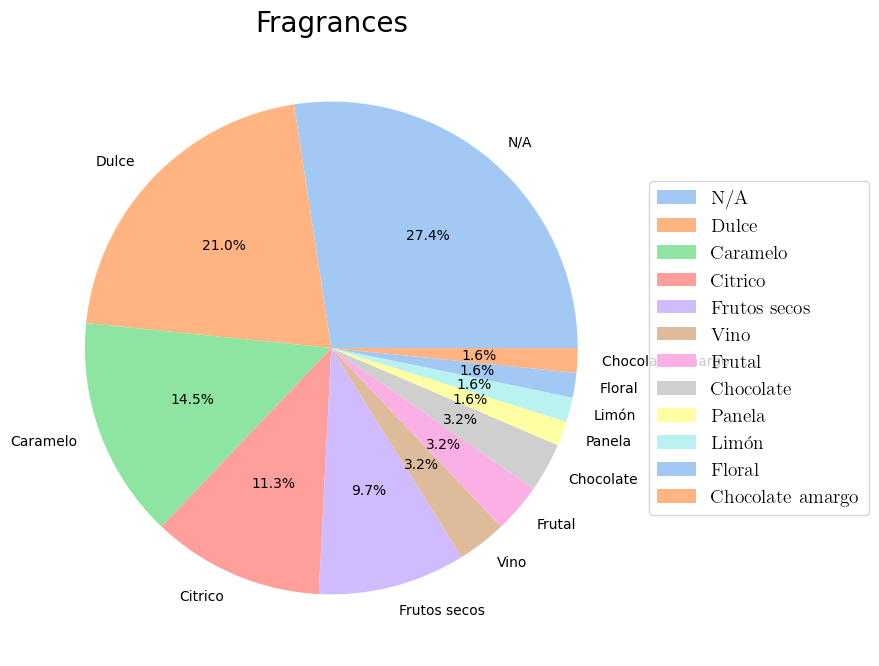

In [13]:
with plt.rc_context({"text.usetex": False}):

    coffee_data["Fragrance"] = coffee_data["Descripcion"].str.extract(r"Fragancia: (\w+.\w+)")
    # Get the count of each unique value in the "Fragrance" column
    coffee_data["Fragrance"] = coffee_data["Fragrance"].replace("Vinoso", "Vino")
    coffee_data["Fragrance"] = coffee_data["Fragrance"].replace("Citrica", "Citrico")
    fragrance_counts = coffee_data["Fragrance"].value_counts()

    fig, ax = plt.subplots(figsize=(8, 8))
    colors = sns.color_palette("pastel", len(fragrance_counts))
    fragance_names, _, labels = ax.pie(fragrance_counts, labels=fragrance_counts.index, colors=colors, autopct='%1.1f%%')

    # Font settings
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'text.usetex': True
    })

    handles = {}
    for i, names in enumerate(fragance_names):
        color = names.get_facecolor()
        label = fragrance_counts.index[i]
        handles[label] = plt.Rectangle((0,0), 1, 1, fc=color)

    ax.legend(handles.values(), handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    ax.set_title("Fragrances", size=20)
    plt.show()


The above pie chart shows a distribution of the number of the percentage each fragrance was detected in the coffee samples during the cupping process. However, it's important to note that a significant number of samples have an unknown or unspecified fragrance. Therefore, it is difficult to draw any conclusions about the expected range of flavors detected through the smell of the coffee samples.

> ### Aroma
>Defined as the smell of the grinded coffee when infused with hot water

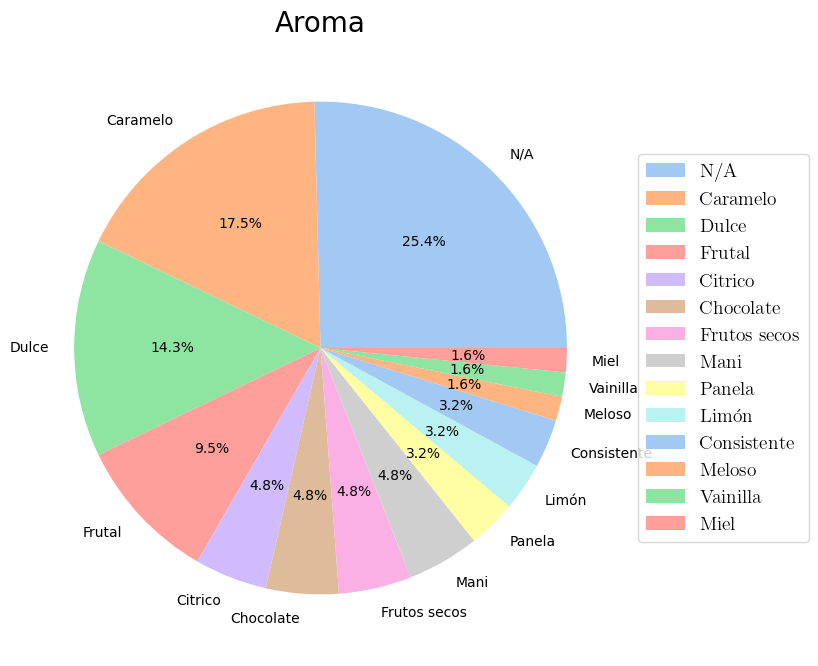

In [14]:
with plt.rc_context({"text.usetex": False}):

    coffee_data["Aroma"] = coffee_data["Descripcion"].str.extract(r"Aroma: (\w+.\w+)")
    coffee_data["Aroma"] = coffee_data["Aroma"].replace("Limon", "Limón")
    coffee_data["Aroma"] = coffee_data["Aroma"].replace("Citrica", "Citrico")
    coffee_data["Aroma"] = coffee_data["Aroma"].replace("Caña de", "Panela")
    aroma = coffee_data["Aroma"].value_counts()

    fig, ax = plt.subplots(figsize=(8, 8))
    colors = sns.color_palette("pastel", len(aroma))
    aroma_names, _, labels = ax.pie(aroma, labels=aroma.index, colors=colors, autopct='%1.1f%%')
    plt.rcParams.update({
            'font.family': 'serif',
            'font.serif': ['Times New Roman'],
            'text.usetex': True
            })

    handles = {}
    for i, names in enumerate(aroma_names):
        color = names.get_facecolor()
        label = aroma.index[i]
        handles[label] = plt.Rectangle((0,0), 1, 1, fc=color)

    ax.legend(handles.values(), handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    ax.set_title("Aroma", size=20)
    plt.show()


Same as happened with the "Fragrance" data, there is a significant percentage of unknown data in the "Aroma" values. Therefore, it is not possible to obtain a conclusion from this figure.

> ### Flavor
> Flavor represents the coffee's principal character, the "mid-range" notes, in between the first impressions given by the coffee's first aroma and acidity to its final aftertaste

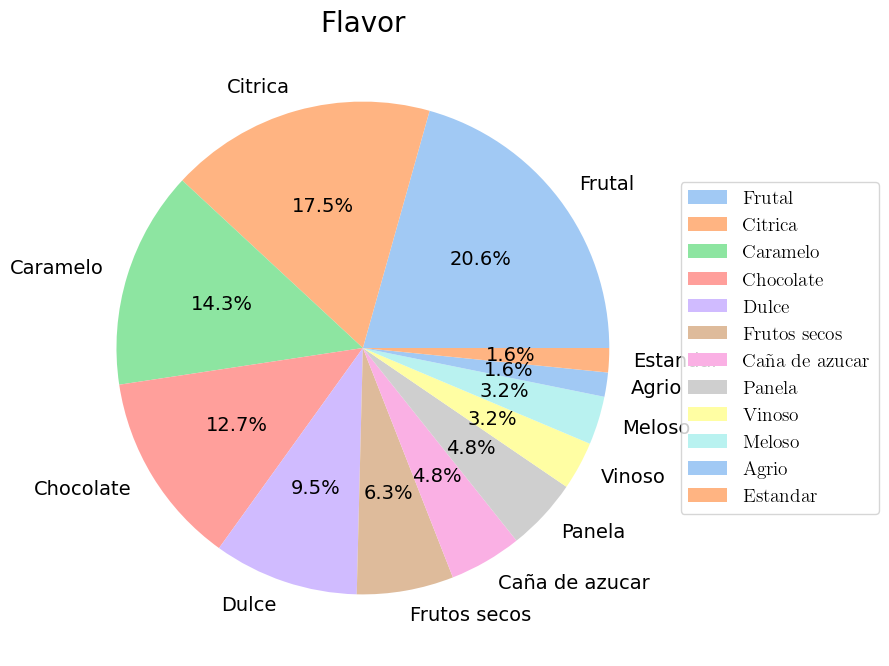

In [47]:
with plt.rc_context({"text.usetex": False}):
    coffee_data["Flavor"] = coffee_data["Descripcion"].str.extract(
    r"Defecto/ Atributo: (\w+.\w+.\w+)")
    flavor = coffee_data["Flavor"].value_counts()

    fig, ax = plt.subplots(figsize=(8, 8))
    colors = sns.color_palette("pastel", len(flavor))
    flavor_names, _, labels = ax.pie(flavor, labels=flavor.index, autopct="%1.1f%%", colors=colors)
    plt.rcParams.update({
                'font.family': 'serif',
                'font.serif': ['Times New Roman'],
                'text.usetex': True
                })

    handles = {}
    for i, names in enumerate(flavor_names):
        color = names.get_facecolor()
        label = flavor.index[i]
        handles[label] = plt.Rectangle((0,0), 1, 1, fc=color)

    ax.legend(handles.values(), handles.keys(), loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    ax.set_title("Flavor", size=20)
    plt.savefig("coffe_pie.png", dpi=300, bbox_inches='tight')
    plt.show()



The pie chart distribution of flavor types in the coffee cupping data reveals a distinct pattern compared to that of Fragrance and Aroma. Notably, there are no missing values, allowing for valuable insights into the representative flavors present in the data. While this figure does not show how the flavors have evolved over time, it does provide a clear picture of the dominant flavors present in the coffee samples.
The most representative flavors from La Celia coffee farm are: frutal, cítrica, caramelo and chocolate. 

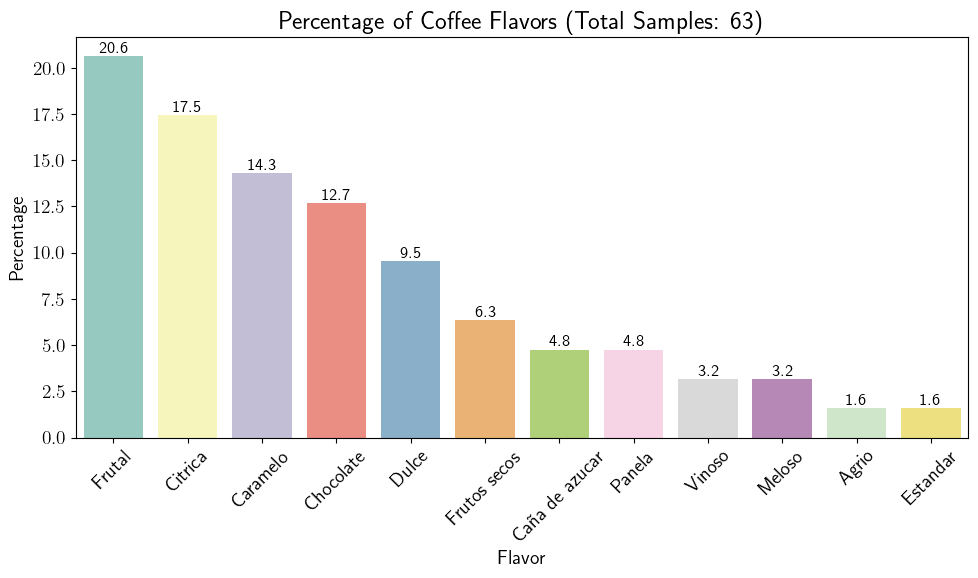

In [46]:
# Bar plot with percentage labels and total coffee samples
plt.figure(figsize=(10, 6))

# Calculate percentages
flavor_percentage = (flavor / flavor.sum()) * 100

# Plot the bar plot with percentages
ax = sns.barplot(x=flavor_percentage.index, y=flavor_percentage.values, palette="Set3")

# Add percentage labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt="%.1f%%", label_type="edge", fontsize=12)

# Display total coffee samples
total_samples = flavor.sum()
plt.title(f"Percentage of Coffee Flavors (Total Samples: {total_samples})", fontsize=18)
plt.xlabel("Flavor", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("coffe_bar_plot.png", dpi=300, bbox_inches='tight')

plt.show()



<Figure size 640x480 with 0 Axes>

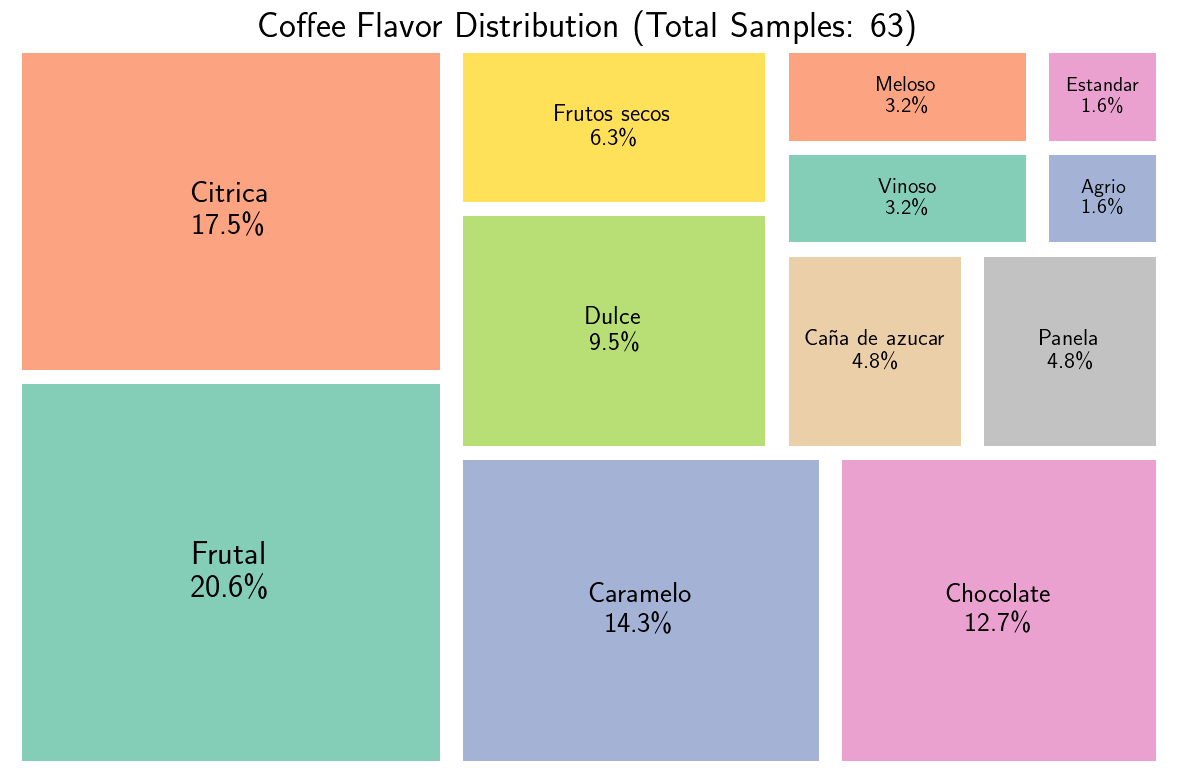

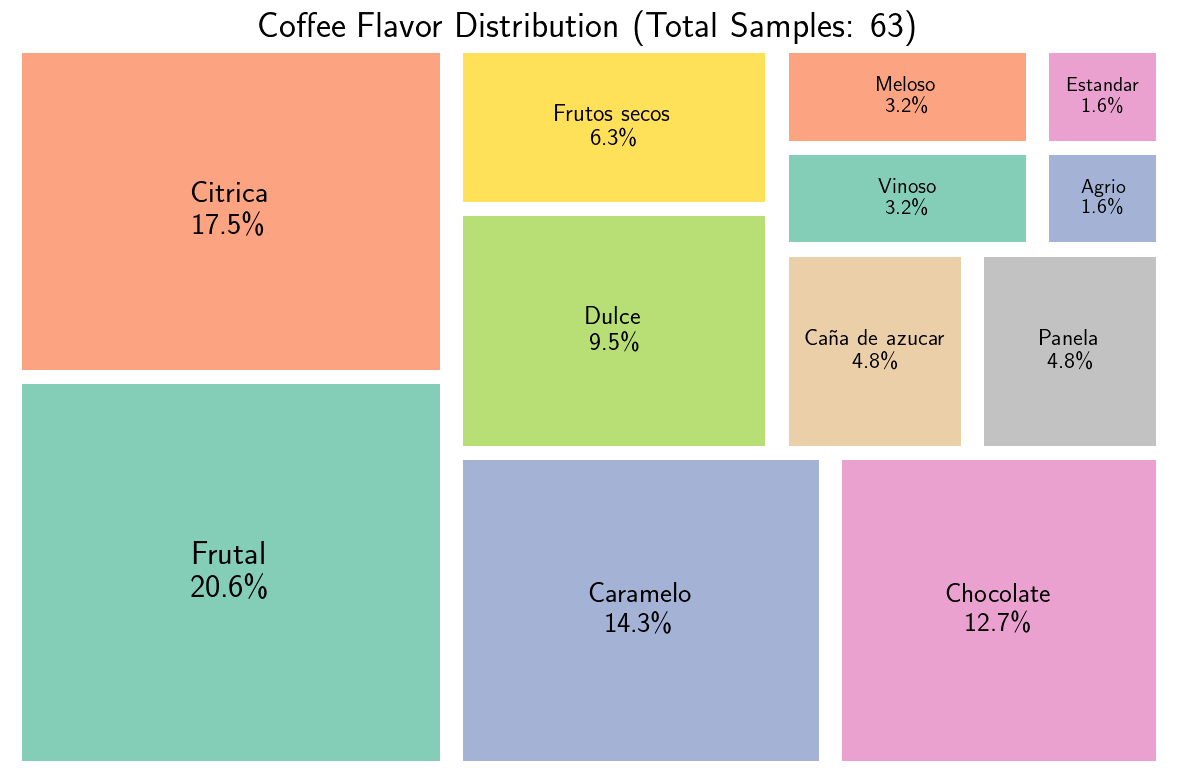

In [45]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate font size based on percentage
def calculate_font_size(percentage, min_size=14, max_size=60):
    # Scale the font size between min_size and max_size depending on the percentage
    return min_size + (percentage / 100) * (max_size - min_size)

# Calculate the percentages for flavors
total_count = flavor.sum()
sizes = flavor.values
percentages = (flavor / total_count) * 100
labels = flavor.index

# Set up LaTeX and font settings
plt.rcParams.update({
    'text.usetex': True,
    'font.size': 14,          # Base font size
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis labels font size
})

# Normalize sizes for the squarify plot
norm_sizes = squarify.normalize_sizes(sizes, 100, 100)

# Plot the rectangles manually
plt.figure(figsize=(12, 8))  # Larger figure for more clarity
rects = squarify.squarify(norm_sizes, 0, 0, 100, 100)  # Get the rectangles for positioning
squarify.plot(sizes=norm_sizes, alpha=.8, color=sns.color_palette("Set2", len(sizes)), pad=True)
plt.axis('off')

# Manually add labels with dynamic font size and bold for larger percentages
for i, rect in enumerate(rects):
    x = rect['x'] + rect['dx'] / 2
    y = rect['y'] + rect['dy'] / 2
    font_size = calculate_font_size(percentages[i])
    weight = 'bold' if percentages[i] > 10 else 'normal'  # Bold for percentages over 10%
    plt.text(x, y, f"{labels[i]}\n{percentages[i]:.1f}\\%", ha='center', va='center', 
             fontsize=font_size, weight=weight)

# Add title with total coffee samples
total_samples = flavor.sum()
plt.title(f"Coffee Flavor Distribution (Total Samples: {total_samples})", fontsize=26)

# Show plot
plt.tight_layout()
plt.savefig("coffe_squares.png", dpi=300, bbox_inches='tight')

plt.show()



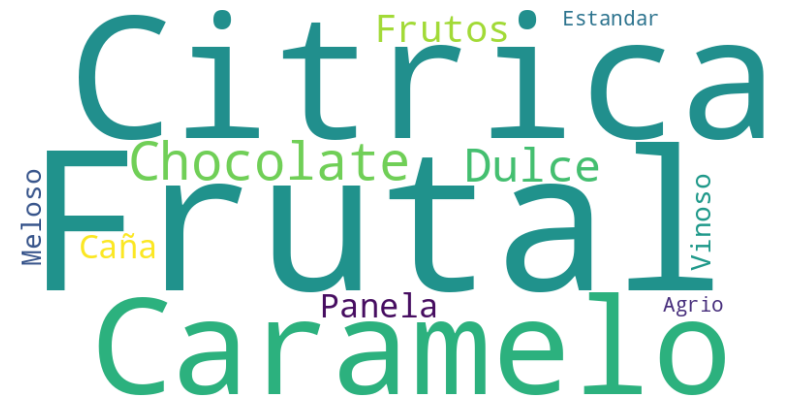

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(flavor)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Conclusions


- This software empowers coffee growers to gain valuable insights into the qualitative, quantitative, and physical attributes of their coffee by building a comprehensive database of cupping analysis results. This approach allows them to better understand the characteristics of their coffee and make informed decisions to improve its quality.
- The experimental setup in their fermentation processes implemented by the coffee growers from La Celia farm to improve the quality of their coffee has yielded significant positive results. This outcome indicates that their efforts to enhance their coffee processing methods have been effective and can serve as a model for other coffee growers seeking to improve their coffee quality.
- To draw more valuable insights from the cupping data, it is essential to refine the data obtained from "Fragrance" and "Aroma" attributes. By doing so, coffee growers can obtain more meaningful and actionable information to improve the quality of their coffee
- Based on the distribution of flavor types in the coffee cupping data, it can be concluded that the coffee samples from La Celia coffee farm have dominant flavors of frutal, cítrica, and caramelo. This information can be used by the coffee growers to improve their coffee quality and production methods by focusing on these representative flavors. However, it is important to note that this analysis only provides a snapshot of the dominant flavors present in the coffee samples and does not show how these flavors may have evolved over time.